      Tipo Test Traffico  RTT  RTT_npt       OTT
0           NTP        0    0    17.75  0.008874
1           NTP        0    0    30.05  0.015025
2           NTP        0    0    22.82  0.011411
3           NTP        0    0    21.39  0.010695
4           NTP        0    0    17.90  0.008948
...         ...      ...  ...      ...       ...
11937       NTP      20M    0    13.98  0.006989
11939       NTP      20M    0    23.30  0.011651
11940       NTP      20M    0    19.58  0.009789
11941       NTP      20M    0    18.92  0.009458
11942       NTP      20M    0    22.44  0.011222

[11847 rows x 5 columns]
\begin{tabular}{lrrrrr}
\toprule
 & mean & var & std & median & count \\
Traffico &  &  &  &  &  \\
\midrule
0 & 18.450000 & 23.750000 & 4.870000 & 18.100000 & 1633 \\
10M & 18.180000 & 29.350000 & 5.420000 & 17.740000 & 1982 \\
15M & 18.150000 & 27.210000 & 5.220000 & 18.070000 & 1985 \\
1M & 19.770000 & 29.370000 & 5.420000 & 19.310000 & 1818 \\
20M & 17.380000 & 24.120000 & 4.9100

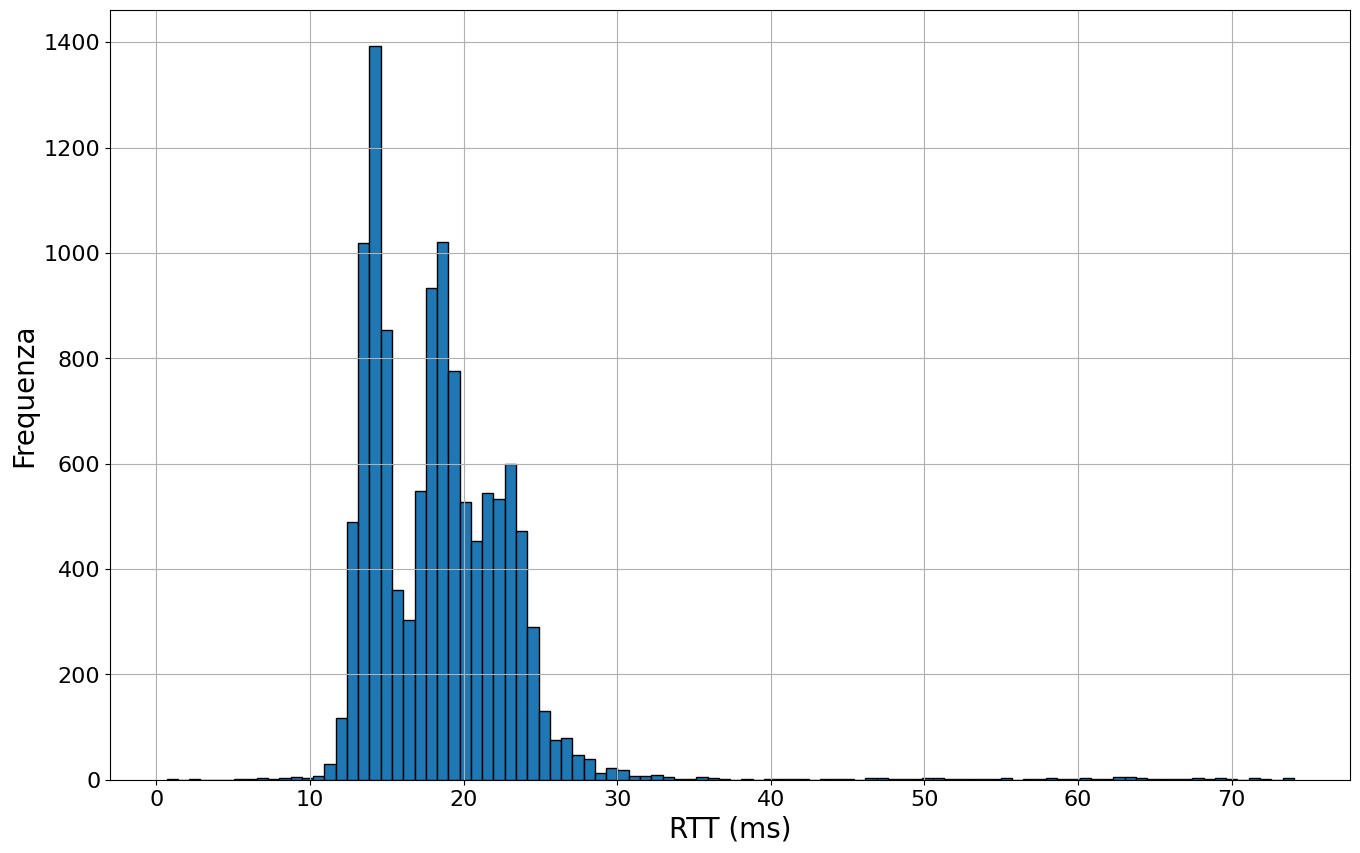

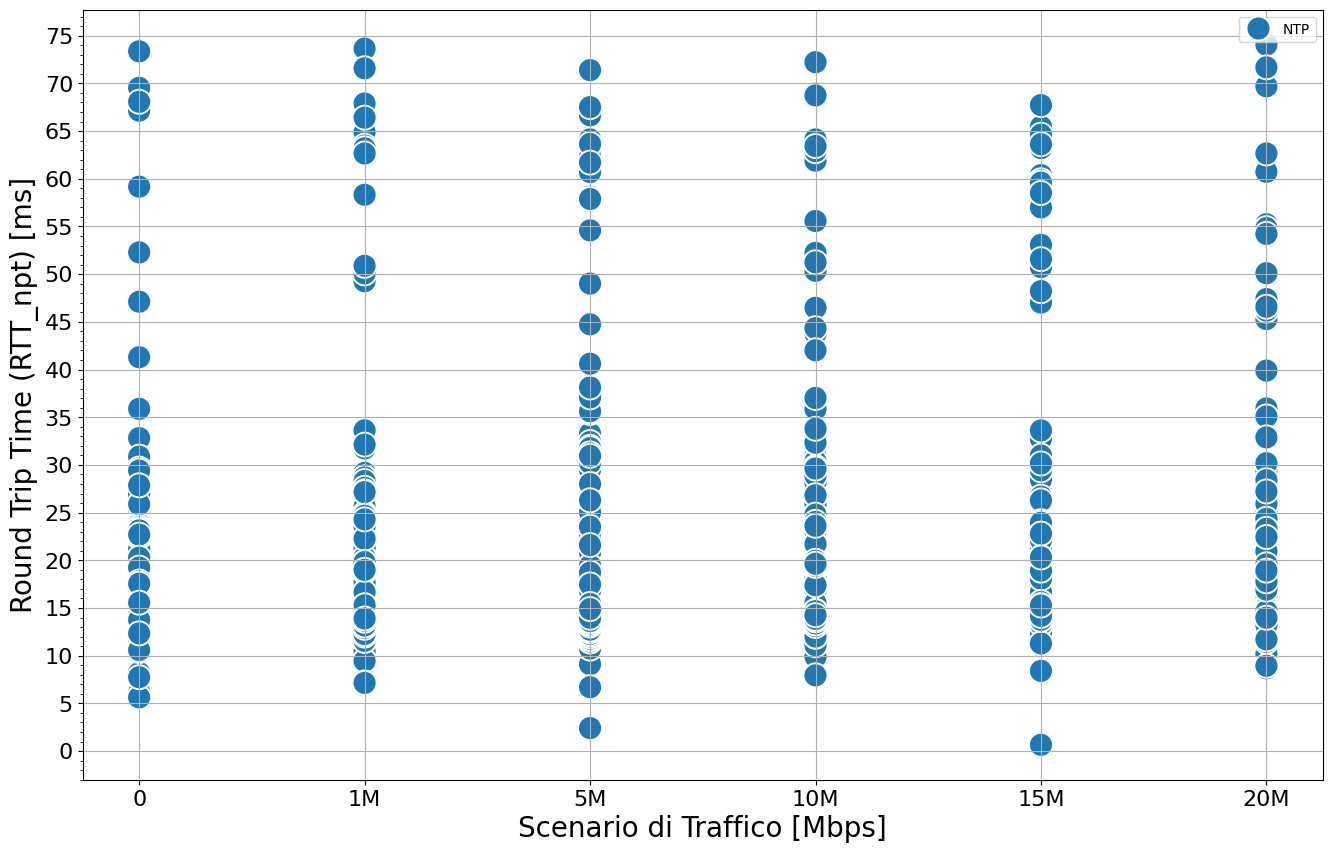

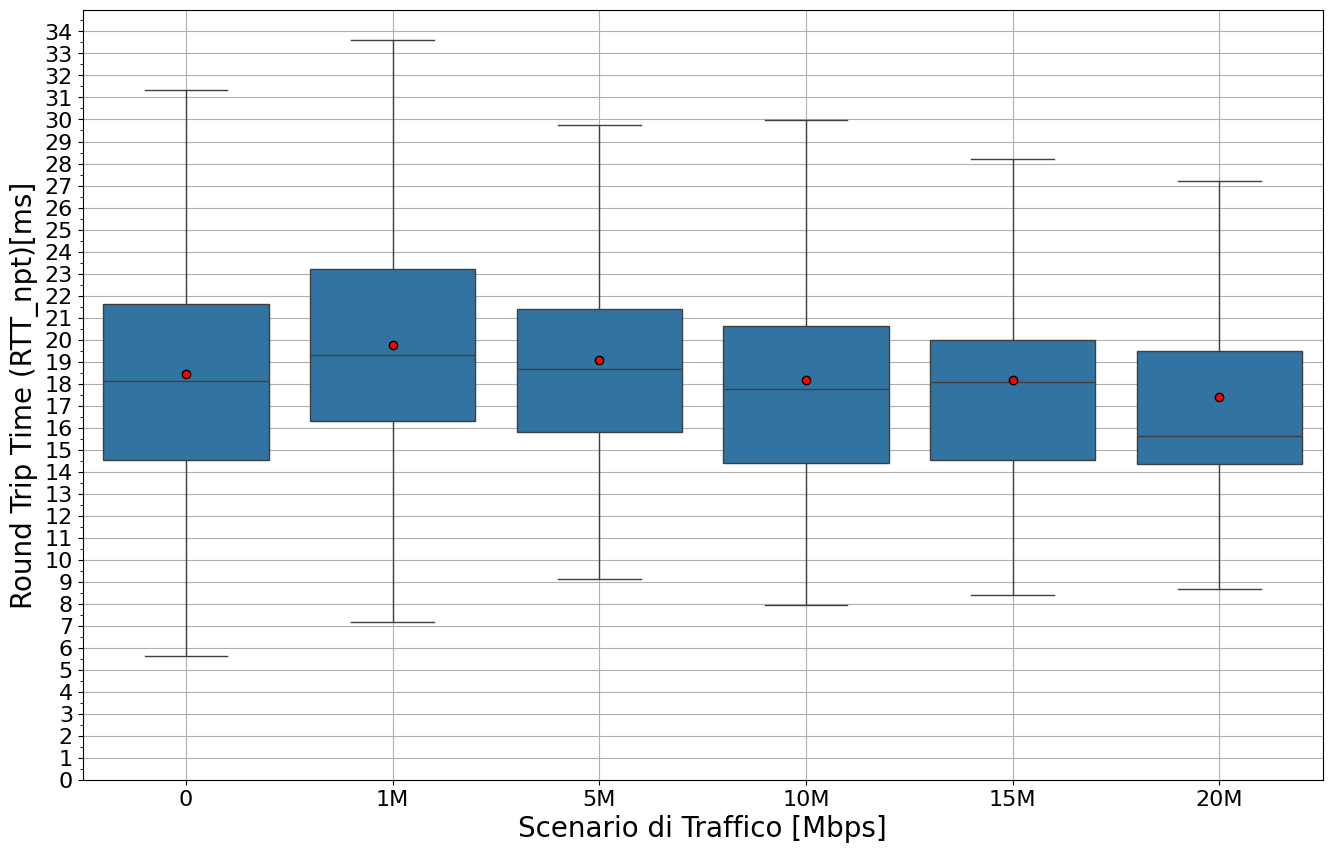

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator

# Leggere i dati dal file CSV
df = pd.read_csv('istanti_temporali_2024-09-27.csv')
df['RTT_npt'] *= 1000
df=df[df['RTT_npt'] > 0]
df['RTT_npt']=np.around(df['RTT_npt'], decimals=2)
print(df)
plt.figure(figsize=(16,10))
plt.hist(df['RTT_npt'],bins=100,edgecolor='black')
plt.grid(True)
plt.xlabel('RTT (ms)', fontsize=20)
plt.ylabel('Frequenza', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# Calcolare la media e la varianza del RTT_npt per tipologia di test
stats = df.groupby('Traffico')['RTT_npt'].agg(['mean','var','std','median','count'])
# Visualizzare le statistiche calcolate
stats=stats.round(2)
print(stats.to_latex())
# Creare il grafico a dispersione TOTALE       
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df, x='Traffico', y='RTT_npt', hue='Tipo Test', s=300)
# Personalizzare gli assi
plt.xlabel('Scenario di Traffico [Mbps]', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Round Trip Time (RTT_npt) [ms]', fontsize=20)
#plt.title('Confronto RTT_npt in base allo scenario di Traffico', fontsize=16)
# Abilitare la griglia
plt.grid(True)
plt.gca().yaxis.set_major_locator(MultipleLocator(5))
plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
# Mostrare il grafico
plt.ylim(bottom=-3)
plt.legend()
plt.show()

# Creare il box plot per la distribuzione del RTT_npt
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, x='Traffico', y='RTT_npt', hue='Tipo Test',showfliers=False,showmeans=True,meanprops={"marker": "o","markerfacecolor": "red","markeredgecolor":"black","markersize":6})
plt.xlabel('Scenario di Traffico [Mbps]', fontsize=20)
plt.legend().remove()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.gca().yaxis.set_major_locator(MultipleLocator(1))
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.5))
plt.ylim(bottom=0)
plt.ylabel('Round Trip Time (RTT_npt)[ms]', fontsize=20)
#plt.title('Distribuzione RTT_npt per i vari scenari di Traffico', fontsize=18)
# Abilitare la griglia
plt.grid(True)
# Mostrare il grafico
plt.show()




    


C:\Users\enric\AppData\Local\Temp\ipykernel_19464\545065310.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_filtrati['Differenza_RTT_npt']=dati_filtrati['RTT_npt'].diff().abs()


0:jitter medio tramite media delle differenze: 3.79 ms
0: jitter medio tramide la deviazione standard delle differenze: 3.79 ms
     Tipo Test Traffico  RTT  RTT_npt       OTT  Differenza_RTT_npt
0          NTP        0    0    17.75  0.008874                 NaN
1          NTP        0    0    30.05  0.015025               12.30
2          NTP        0    0    22.82  0.011411                7.23
3          NTP        0    0    21.39  0.010695                1.43
4          NTP        0    0    17.90  0.008948                3.49
...        ...      ...  ...      ...       ...                 ...
1640       NTP        0    0    17.50  0.008752                1.74
1641       NTP        0    0    17.78  0.008890                0.28
1642       NTP        0    0    17.55  0.008776                0.23
1643       NTP        0    0    15.56  0.007778                1.99
1644       NTP        0    0    27.86  0.013932               12.30

[1633 rows x 6 columns]


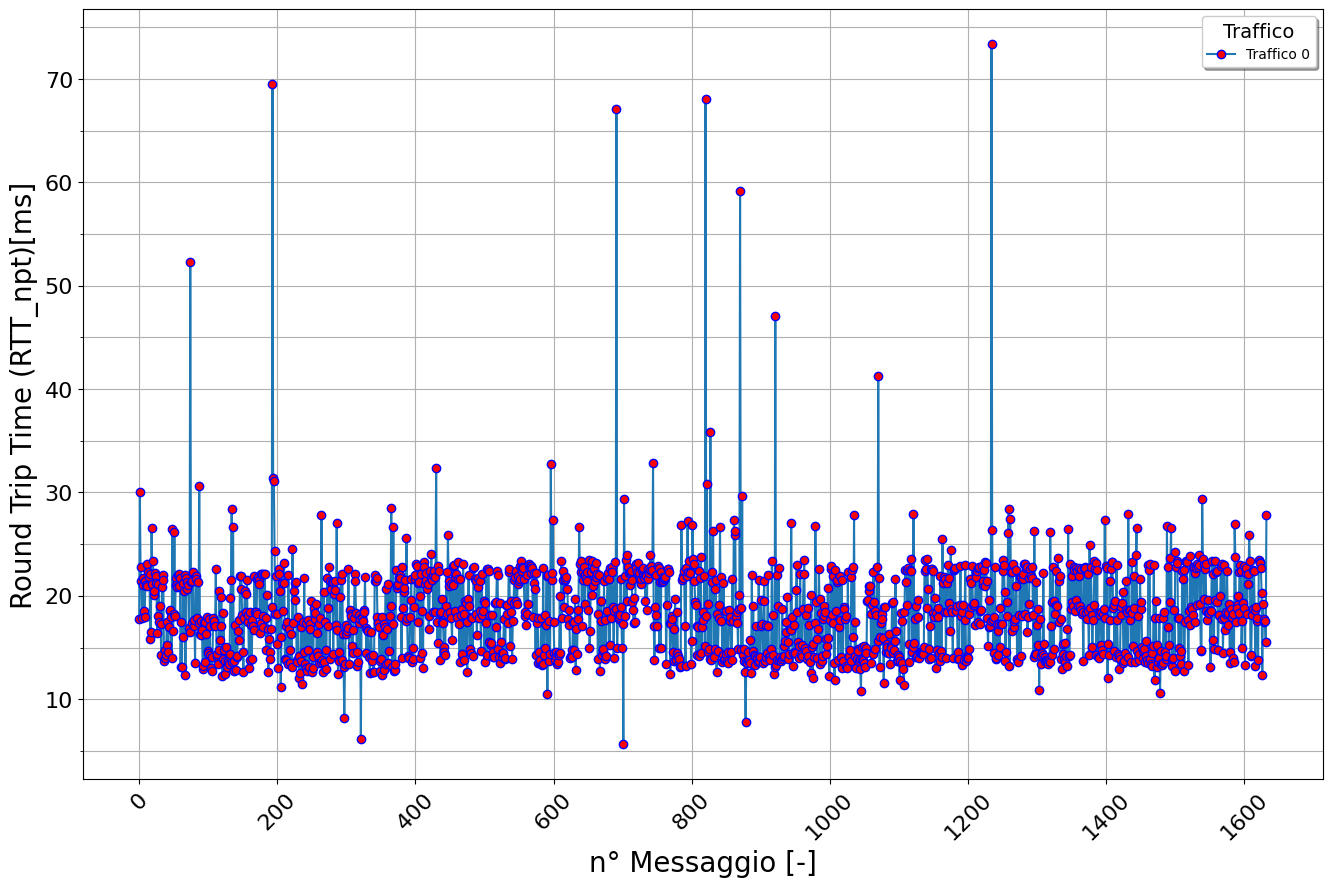

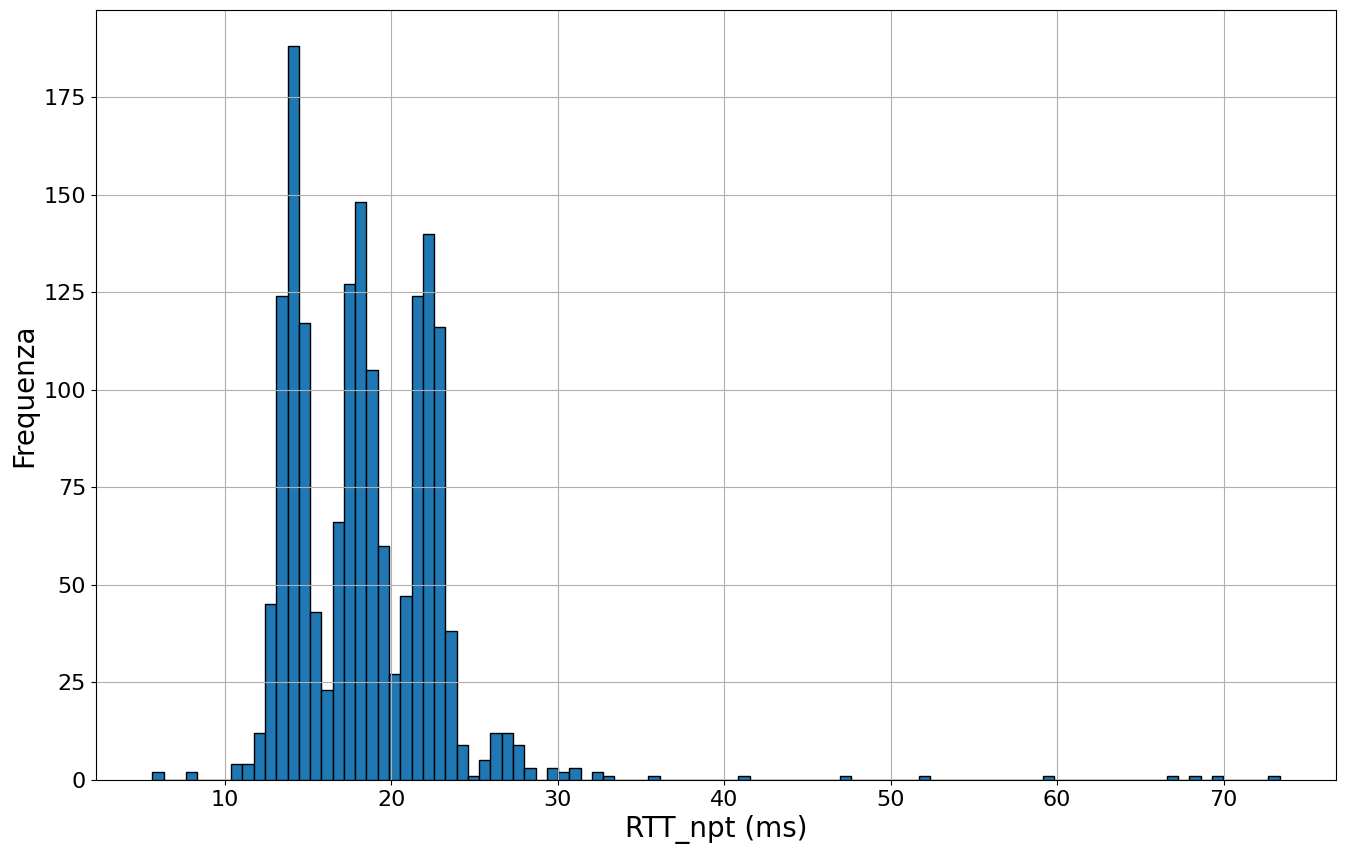

C:\Users\enric\AppData\Local\Temp\ipykernel_19464\545065310.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_filtrati['Differenza_RTT_npt']=dati_filtrati['RTT_npt'].diff().abs()


1M:jitter medio tramite media delle differenze: 4.26 ms
1M: jitter medio tramide la deviazione standard delle differenze: 4.26 ms
     Tipo Test Traffico  RTT  RTT_npt       OTT  Differenza_RTT_npt
1645       NTP       1M    0    15.75  0.007874                 NaN
1646       NTP       1M    0    16.55  0.008273                0.80
1647       NTP       1M    0    15.26  0.007632                1.29
1648       NTP       1M    0    12.71  0.006356                2.55
1649       NTP       1M    0    14.12  0.007058                1.41
...        ...      ...  ...      ...       ...                 ...
3485       NTP       1M    0    19.78  0.009888                4.49
3486       NTP       1M    0    13.67  0.006834                6.11
3487       NTP       1M    0    19.81  0.009906                6.14
3488       NTP       1M    0    13.90  0.006951                5.91
3489       NTP       1M    0    19.00  0.009498                5.10

[1818 rows x 6 columns]


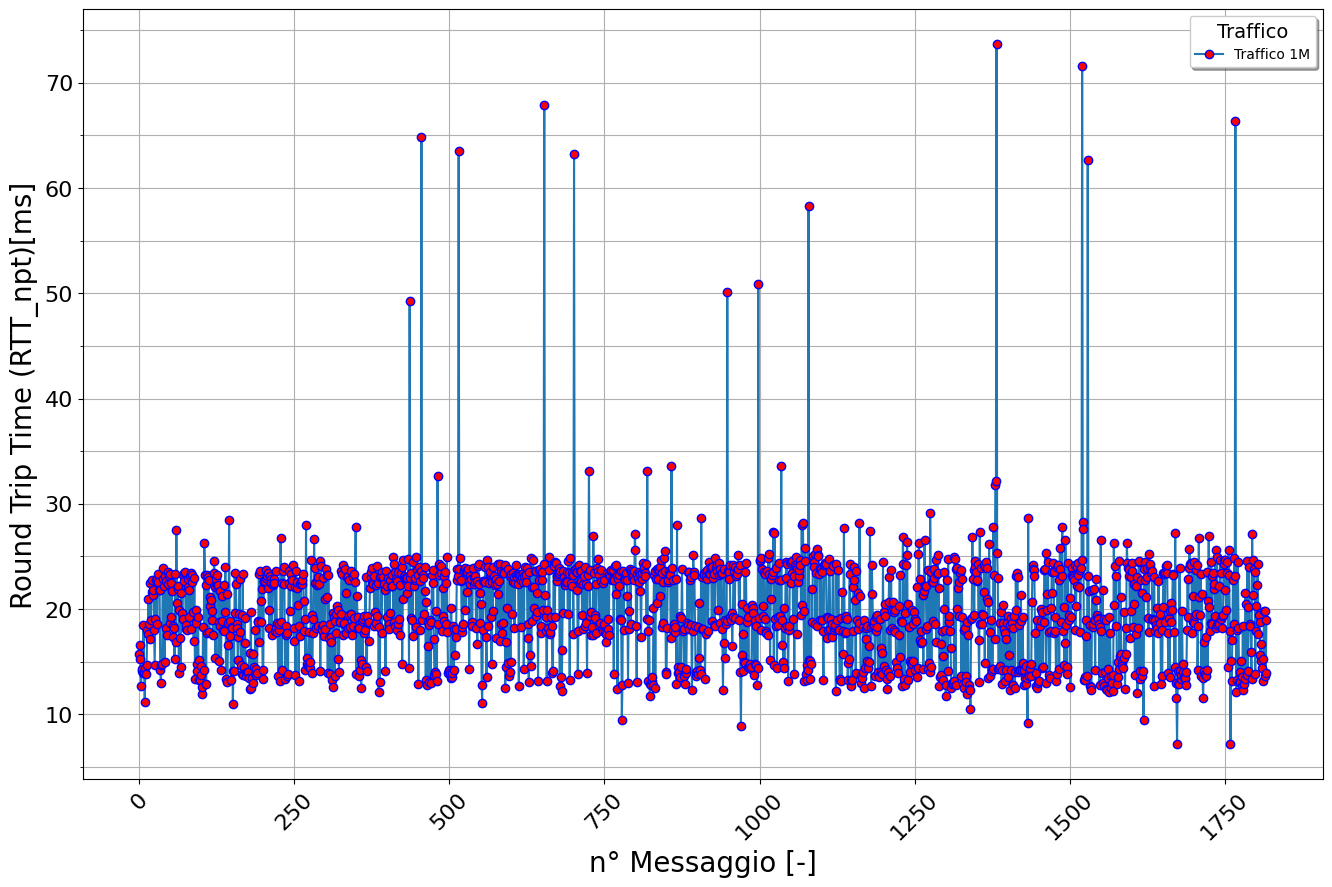

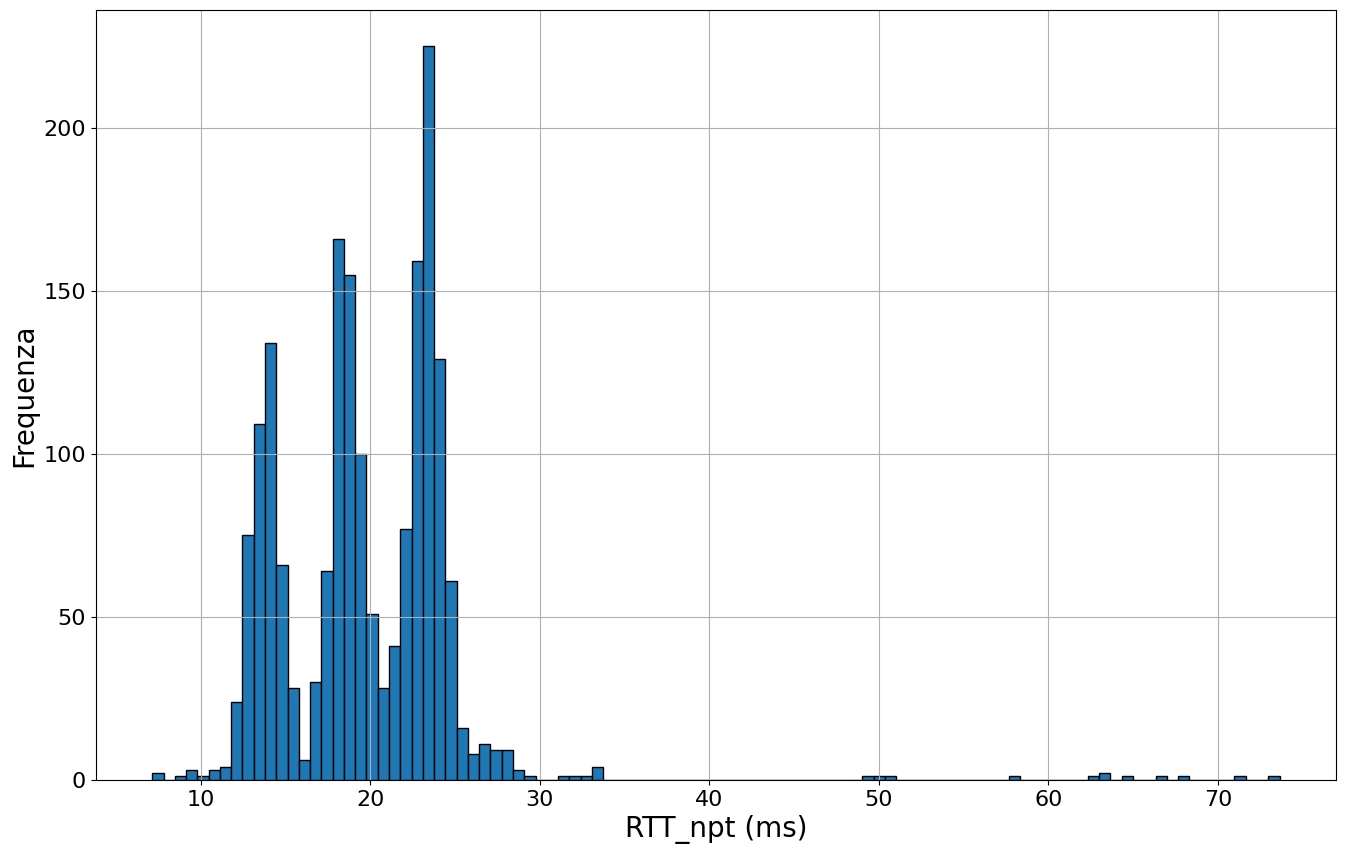

C:\Users\enric\AppData\Local\Temp\ipykernel_19464\545065310.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_filtrati['Differenza_RTT_npt']=dati_filtrati['RTT_npt'].diff().abs()


5M:jitter medio tramite media delle differenze: 4.27 ms
5M: jitter medio tramide la deviazione standard delle differenze: 4.27 ms
     Tipo Test Traffico  RTT  RTT_npt       OTT  Differenza_RTT_npt
3490       NTP       5M    0    23.74  0.011871                 NaN
3491       NTP       5M    0    23.69  0.011847                0.05
3492       NTP       5M    0    30.06  0.015030                6.37
3493       NTP       5M    0    13.89  0.006944               16.17
3494       NTP       5M    0    12.71  0.006354                1.18
...        ...      ...  ...      ...       ...                 ...
5938       NTP       5M    0    13.63  0.006815                0.53
5939       NTP       5M    0    17.47  0.008735                3.84
5940       NTP       5M    0    13.98  0.006988                3.49
5941       NTP       5M    0    15.42  0.007709                1.44
5942       NTP       5M    0    14.89  0.007444                0.53

[2434 rows x 6 columns]


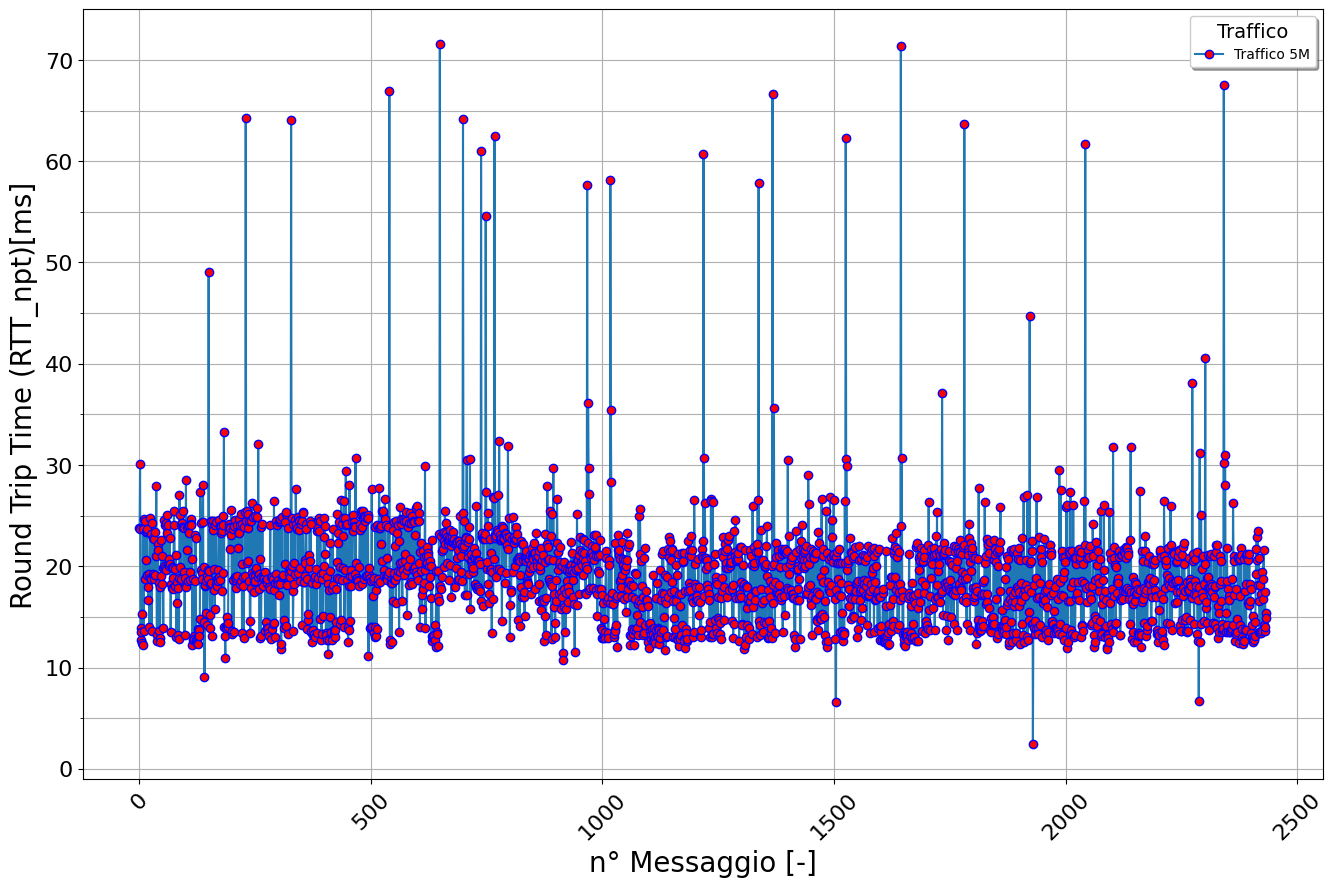

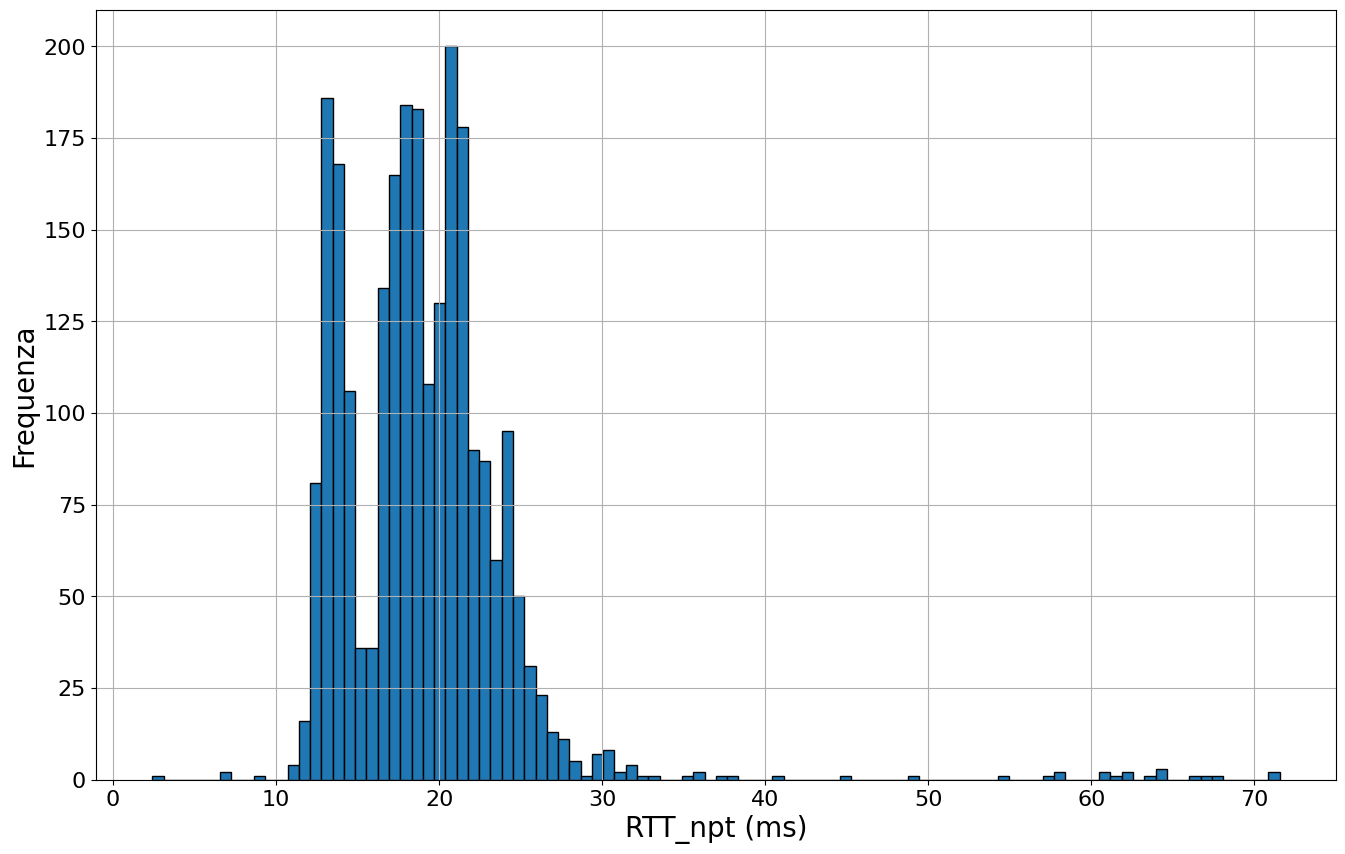

C:\Users\enric\AppData\Local\Temp\ipykernel_19464\545065310.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_filtrati['Differenza_RTT_npt']=dati_filtrati['RTT_npt'].diff().abs()


10M:jitter medio tramite media delle differenze: 4.38 ms
10M: jitter medio tramide la deviazione standard delle differenze: 4.38 ms
     Tipo Test Traffico  RTT  RTT_npt       OTT  Differenza_RTT_npt
5944       NTP      10M    0    13.91  0.006955                 NaN
5945       NTP      10M    0    21.01  0.010507                7.10
5946       NTP      10M    0    13.25  0.006626                7.76
5947       NTP      10M    0    22.82  0.011409                9.57
5948       NTP      10M    0    22.41  0.011205                0.41
...        ...      ...  ...      ...       ...                 ...
7938       NTP      10M    0    17.39  0.008697                2.15
7939       NTP      10M    0    14.67  0.007333                2.72
7940       NTP      10M    0    19.41  0.009706                4.74
7941       NTP      10M    0    19.64  0.009818                0.23
7942       NTP      10M    0    14.25  0.007123                5.39

[1982 rows x 6 columns]


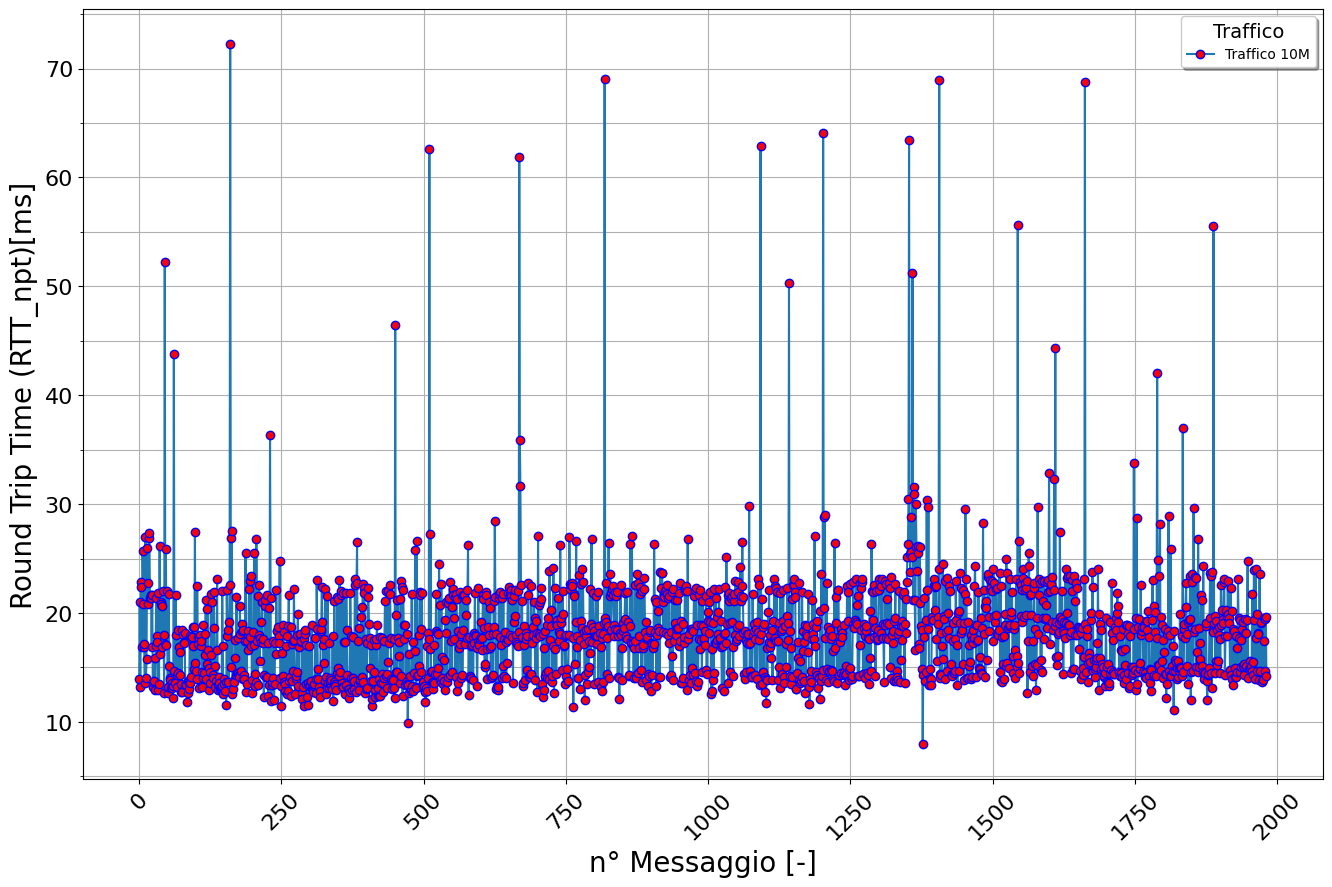

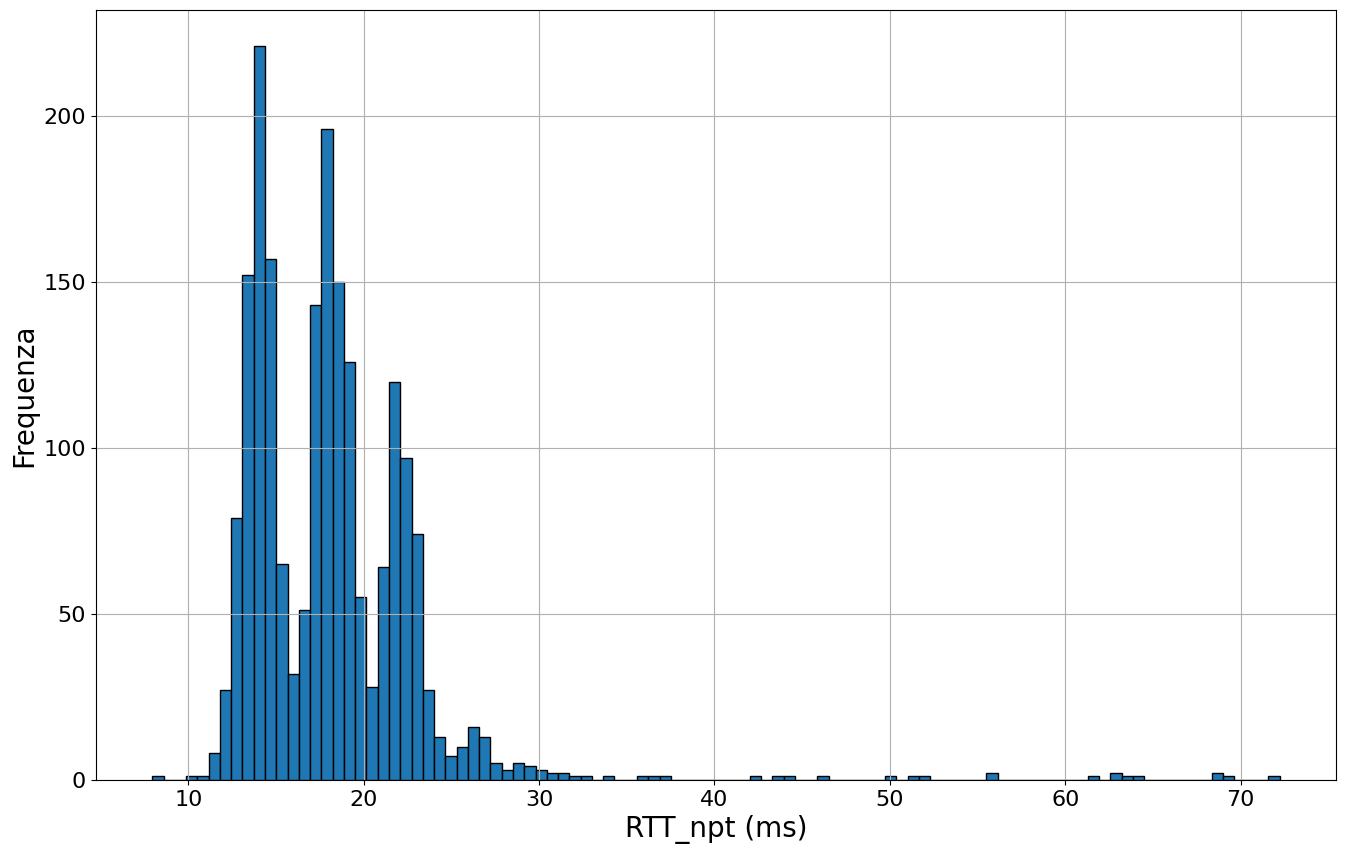

C:\Users\enric\AppData\Local\Temp\ipykernel_19464\545065310.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_filtrati['Differenza_RTT_npt']=dati_filtrati['RTT_npt'].diff().abs()


15M:jitter medio tramite media delle differenze: 4.39 ms
15M: jitter medio tramide la deviazione standard delle differenze: 4.39 ms
     Tipo Test Traffico  RTT  RTT_npt       OTT  Differenza_RTT_npt
7943       NTP      15M    0    14.23  0.007113                 NaN
7944       NTP      15M    0    18.82  0.009411                4.59
7945       NTP      15M    0    23.39  0.011694                4.57
7946       NTP      15M    0    17.31  0.008656                6.08
7947       NTP      15M    0    14.44  0.007221                2.87
...        ...      ...  ...      ...       ...                 ...
9938       NTP      15M    0    14.17  0.007086                4.75
9939       NTP      15M    0    15.26  0.007629                1.09
9940       NTP      15M    0    23.94  0.011968                8.68
9941       NTP      15M    0    22.80  0.011401                1.14
9942       NTP      15M    0    20.30  0.010149                2.50

[1985 rows x 6 columns]


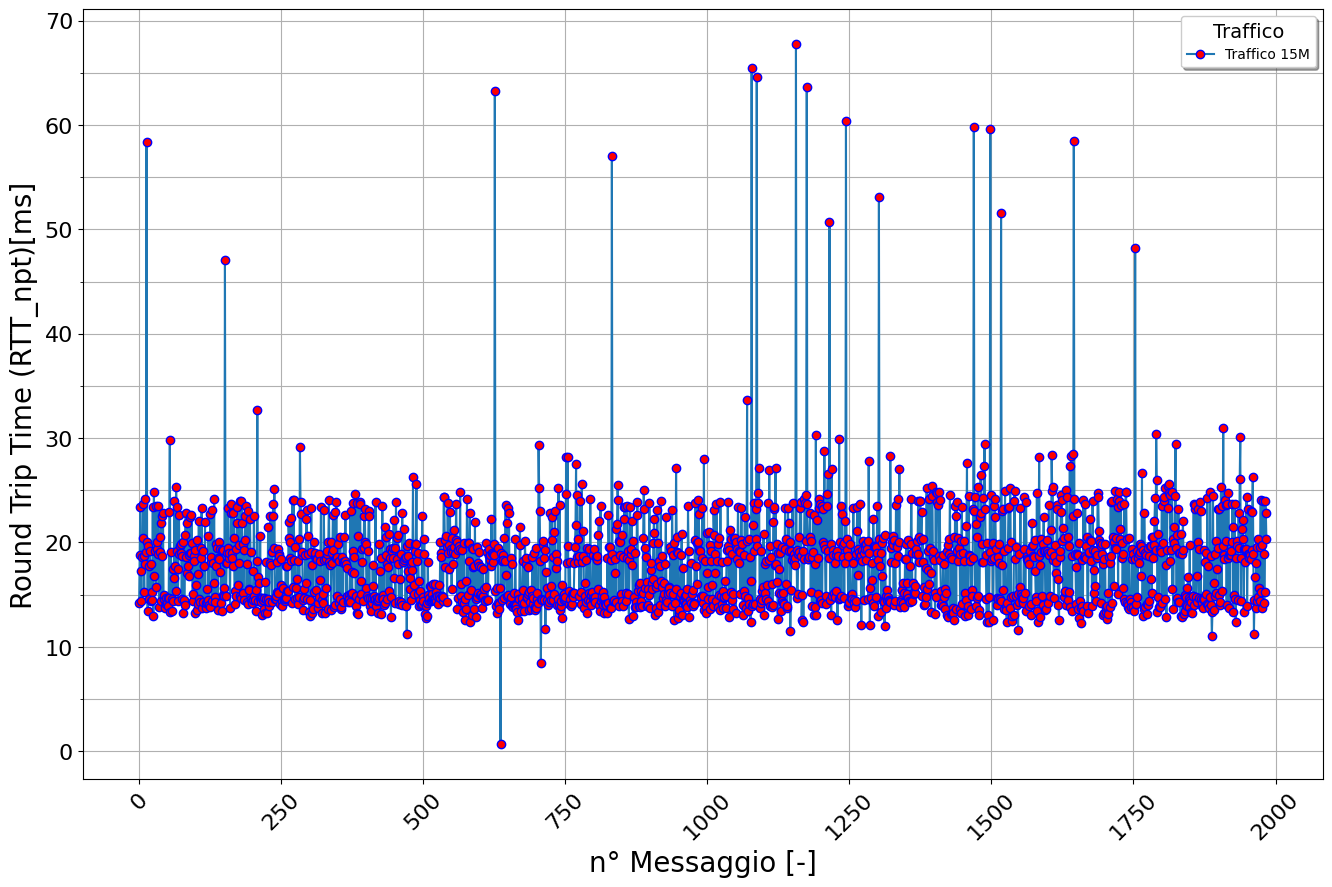

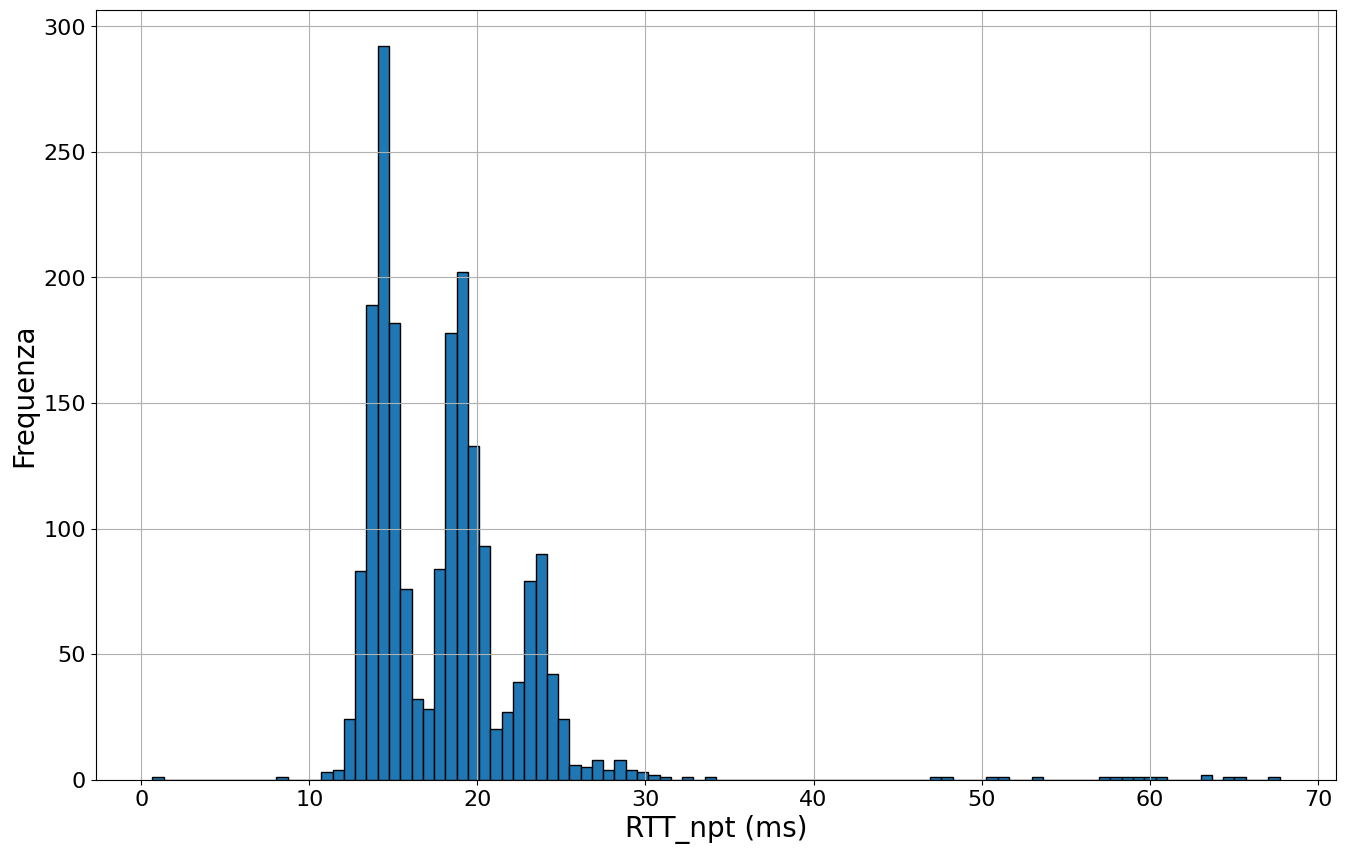

C:\Users\enric\AppData\Local\Temp\ipykernel_19464\545065310.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_filtrati['Differenza_RTT_npt']=dati_filtrati['RTT_npt'].diff().abs()


20M:jitter medio tramite media delle differenze: 3.95 ms
20M: jitter medio tramide la deviazione standard delle differenze: 3.95 ms
      Tipo Test Traffico  RTT  RTT_npt       OTT  Differenza_RTT_npt
9943        NTP      20M    0    21.83  0.010917                 NaN
9944        NTP      20M    0    18.26  0.009128                3.57
9945        NTP      20M    0    23.72  0.011859                5.46
9946        NTP      20M    0    13.95  0.006974                9.77
9947        NTP      20M    0    19.28  0.009640                5.33
...         ...      ...  ...      ...       ...                 ...
11937       NTP      20M    0    13.98  0.006989                3.82
11939       NTP      20M    0    23.30  0.011651                9.32
11940       NTP      20M    0    19.58  0.009789                3.72
11941       NTP      20M    0    18.92  0.009458                0.66
11942       NTP      20M    0    22.44  0.011222                3.52

[1995 rows x 6 columns]


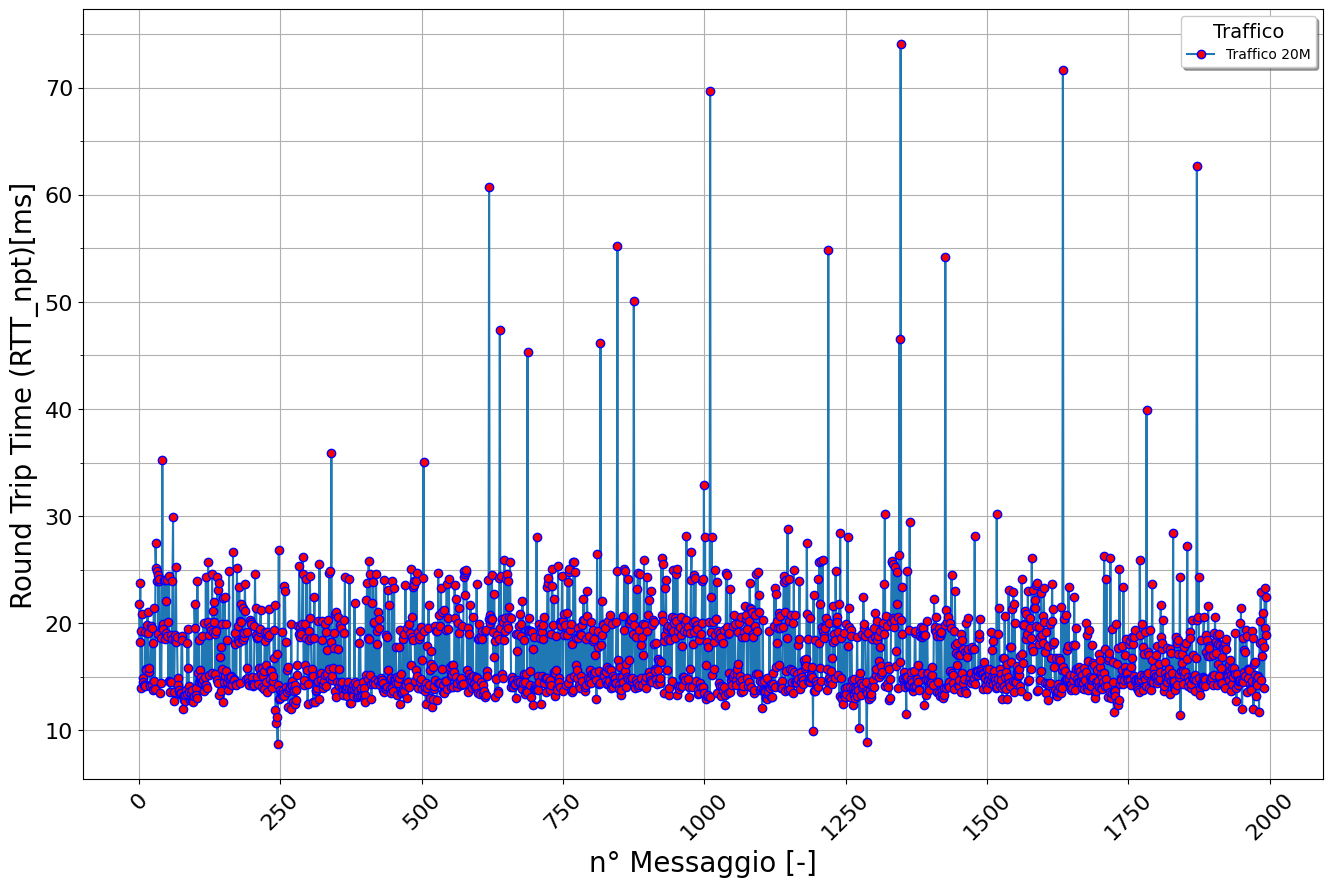

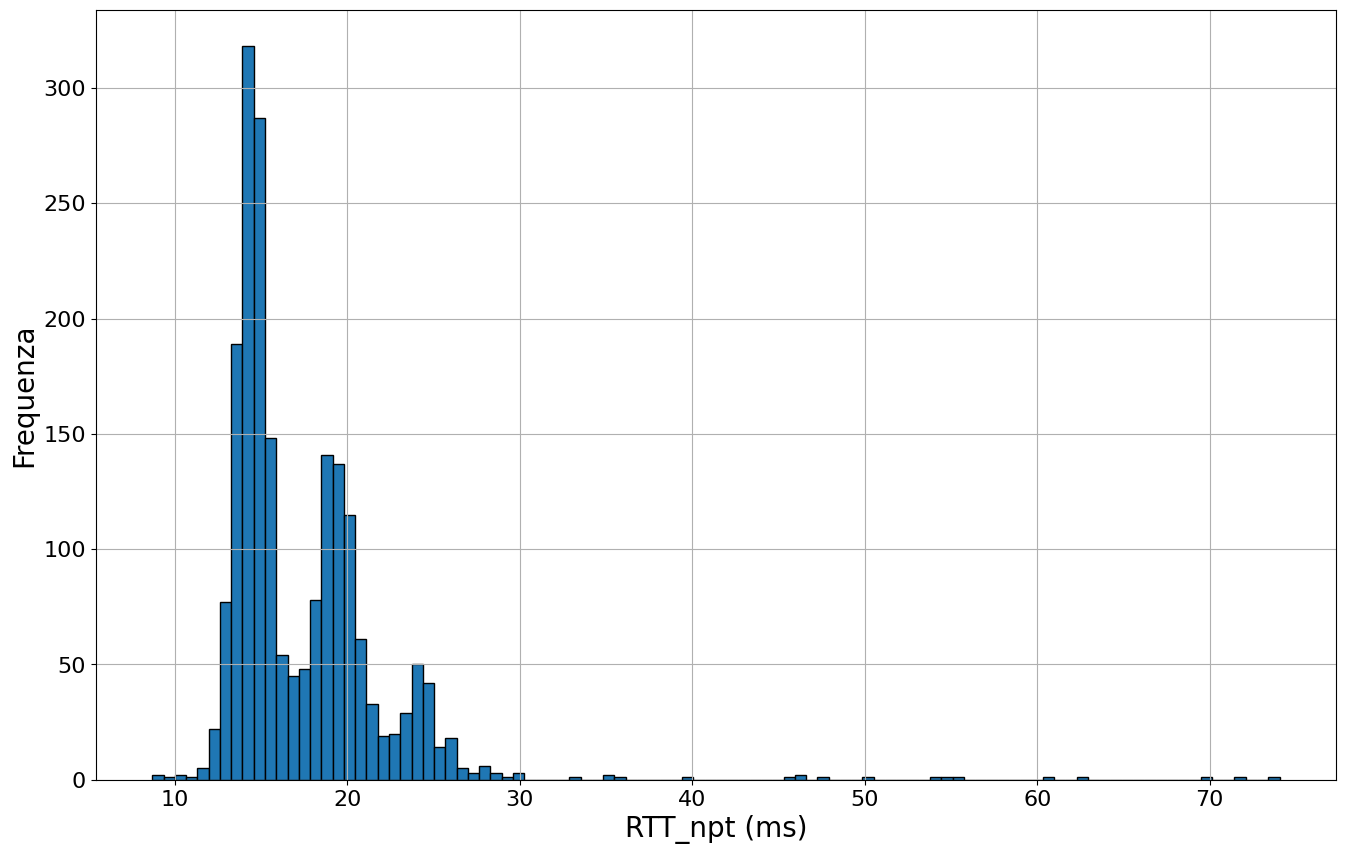

In [30]:
#Stima Jitter TEST ECHO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator
traffico=['0','1M','5M','10M','15M','20M']
# Leggere i dati dal file CSV
df = pd.read_csv('istanti_temporali_2024-09-27.csv')
df['RTT_npt']*=1000
df=df[df['RTT_npt'] > 0]
df['RTT_npt']=np.around(df['RTT_npt'], decimals=2)


for traf in traffico:
    plt.figure(figsize=(16,10))
    dati_filtrati=df[df['Traffico']==traf]
    dati_filtrati['Differenza_RTT_npt']=dati_filtrati['RTT_npt'].diff().abs()
    jitter_medio=dati_filtrati['Differenza_RTT_npt'].mean(skipna=True)
    print(f"{traf}:jitter medio tramite media delle differenze: {jitter_medio:.2f} ms")
    jitter_medio_dev=dati_filtrati['Differenza_RTT_npt'].std(skipna=True)  
    print(f"{traf}: jitter medio tramide la deviazione standard delle differenze: {jitter_medio:.2f} ms")
    plt.plot(range(len(dati_filtrati)),dati_filtrati['RTT_npt'],marker='o',markerfacecolor='red',markeredgecolor='blue',label=f'Traffico {traf}')
    print(dati_filtrati)
    plt.legend(
        loc='upper right',
        title='Traffico',
        fontsize='medium',
        shadow=True,
        title_fontsize='14',
        fancybox=True
        )
    plt.xlabel('n° Messaggio [-]', fontsize=20)
    plt.ylabel('Round Trip Time (RTT_npt)[ms]', fontsize=20)
    plt.xticks(rotation=45)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.gca().yaxis.set_major_locator(MultipleLocator(10))
    plt.gca().yaxis.set_minor_locator(MultipleLocator(5))
    plt.grid(True, which='both')
#istogramma delle frequenze
    plt.figure(figsize=(16,10))
        
    plt.hist(dati_filtrati['RTT_npt'],bins=100,edgecolor='black')
    plt.grid(True)
    plt.xlabel('RTT_npt (ms)', fontsize=20)
    plt.ylabel('Frequenza', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()
        